In [54]:
import torch
import torch.nn as nn
from torch.nn import functional as F

import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
from pathlib import Path

# data_dir = "../data"
data_dir = "/home/HDD12TB/datasets/images/emotions/ACMMM25/AVI/AVI_Challenge_dataset"
DATA_DIR_PATH = Path(data_dir)
PREPROCESSED_TRAIN_DIR_PATH = DATA_DIR_PATH / "preprocessed_train_data"
PREPROCESSED_VAL_DIR_PATH = DATA_DIR_PATH / "preprocessed_val_data"
PREPROCESSED_TEST_DIR_PATH = DATA_DIR_PATH / "preprocessed_test_data"

VIDEO_DIM = 1280
AUDIO_DIM = 1280
TEXT_DIM = 768

In [21]:
import pandas as pd

df_train = pd.read_csv(PREPROCESSED_TRAIN_DIR_PATH / "train_data.csv")
df_val = pd.read_csv(PREPROCESSED_VAL_DIR_PATH / "val_data.csv")
df_test = pd.read_csv(PREPROCESSED_TEST_DIR_PATH / "test_data.csv")

In [22]:
df_train

id       age  work_experience  Honesty-Humility  \
0    60fccc84440f8e8c82ca0288  0.061224         0.000000          3.781250   
1    639881e5774909b88ee9389a  0.693878         0.666667          3.918750   
2    60e1d5f866e681d7e33fd01c  0.448980         0.529412          3.075000   
3    62ceba5fdab49dfc90278cbb  0.102041         0.098039          3.970000   
4    6134113b9f3f724a7cf9e390  0.204082         0.235294          3.037500   
..                        ...       ...              ...               ...   
445  5fbd371dc57ae80a38ba00c2  0.306122         0.196078          3.608333   
446  5a95fee189de8200013eddd4  0.448980         0.392157          3.368750   
447  629a6460a0232815dab01a01  0.265306         0.137255          3.368750   
448  5db5dacdb2d499000a8f4439  0.285714         0.254902          3.162500   
449  5dcf4136cf8e7e086ea019e4  0.755102         0.607843          3.812500   

     Extraversion  Agreeableness  Conscientiousness  Integrity  Collegiality  \
0        3.806250       4.006250           3.668750        4.0           3.9   
1        3.475000       3.950000           4.100000        3.6           2.4   
2        2.912500       2.612500           3.562500        3.5           2.5   
3        2.725000       3.312500           3.381250        3.2           3.1   
4        2.825000       3.062500           2.931250        3.5           3.5   
..            ...            ...                ...        ...           ...   
445      3.416667       3.716667           3.558333        3.5           4.0   
446      2.812500       2.912500           2.893750        3.5           2.9   
447      3.075000       3.443750           3.162500        2.9           3.1   
448      3.118750       3.643750           3.062500        3.0           3.8   
449      2.400000       2.762500           2.787500        3.6           3.4   

     Social_versatility  ...  gender_2  gender_3  gender_4  education_1  \
0                   4.0  ...         1         0         0            0   
1                   2.5  ...         0         0         0            0   
2                   2.5  ...         0         1         0            0   
3                   3.3  ...         1         0         0            0   
4                   3.5  ...         1         0         0            0   
..                  ...  ...       ...       ...       ...          ...   
445                 3.7  ...         0         0         0            0   
446                 2.9  ...         1         0         0            0   
447                 2.9  ...         1         0         0            0   
448                 3.5  ...         0         0         1            0   
449                 3.2  ...         1         0         0            0   

     education_2  education_3  education_4  education_5  education_6  \
0              1            0            0            0            0   
1              0            1            0            0            0   
2              0            1            0            0            0   
3              0            1            0            0            0   
4              0            0            1            0            0   
..           ...          ...          ...          ...          ...   
445            0            0            1            0            0   
446            0            1            0            0            0   
447            0            0            1            0            0   
448            0            0            0            1            0   
449            0            0            1            0            0   

     education_7  
0              0  
1              0  
2              0  
3              0  
4              0  
..           ...  
445            0  
446            0  
447            0  
448            0  
449            0  

[450 rows x 23 columns]

In [23]:
meta_columns = [
    "age",
    "work_experience",
    *[f"gender_{i}" for i in range(1, 5)],
    *[f"education_{i}" for i in range(1, 8)],
]
meta_columns

['age',
 'work_experience',
 'gender_1',
 'gender_2',
 'gender_3',
 'gender_4',
 'education_1',
 'education_2',
 'education_3',
 'education_4',
 'education_5',
 'education_6',
 'education_7']

In [24]:
features = df_train[meta_columns]
features

age  work_experience  gender_1  gender_2  gender_3  gender_4  \
0    0.061224         0.000000         0         1         0         0   
1    0.693878         0.666667         1         0         0         0   
2    0.448980         0.529412         0         0         1         0   
3    0.102041         0.098039         0         1         0         0   
4    0.204082         0.235294         0         1         0         0   
..        ...              ...       ...       ...       ...       ...   
445  0.306122         0.196078         1         0         0         0   
446  0.448980         0.392157         0         1         0         0   
447  0.265306         0.137255         0         1         0         0   
448  0.285714         0.254902         0         0         0         1   
449  0.755102         0.607843         0         1         0         0   

     education_1  education_2  education_3  education_4  education_5  \
0              0            1            0            0            0   
1              0            0            1            0            0   
2              0            0            1            0            0   
3              0            0            1            0            0   
4              0            0            0            1            0   
..           ...          ...          ...          ...          ...   
445            0            0            0            1            0   
446            0            0            1            0            0   
447            0            0            0            1            0   
448            0            0            0            0            1   
449            0            0            0            1            0   

     education_6  education_7  
0              0            0  
1              0            0  
2              0            0  
3              0            0  
4              0            0  
..           ...          ...  
445            0            0  
446            0            0  
447            0            0  
448            0            0  
449            0            0  

[450 rows x 13 columns]

In [45]:
personality_labels = [
    "Honesty-Humility",
    "Extraversion",
    "Agreeableness",
    "Conscientiousness",
]
performance_labels = [
    "Integrity",
    "Collegiality",
    "Social_versatility",
    "Development_orientation",
    "Hireability",
]
postfixes = [
    "_q1_generic",
    "_q2_generic",
    "_q3_personality",
    "_q4_personality",
    "_q5_personality",
    "_q6_personality",
]

In [ ]:
import os
import warnings


def load_tensor(path: Path, dim: int):
    if os.path.exists(path):
        tensor = torch.load(f=path, map_location="cpu")
    else:
        warnings.warn(f"Not found on {path}")
        tensor = torch.zeros(dim)

    return tensor


def feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    extra = []

    for id, row in df.iterrows():
        for postfix in postfixes:
            video_id = f"{row['id']}{postfix}"

    pass


def prepare_df(df: pd.DataFrame, preprocessed_dir_path: Path) -> pd.DataFrame:
    data = []
    for id, row in df.iterrows():
        for postfix in postfixes:
            video_id = f"{row['id']}{postfix}"

            video_embedding = load_tensor(
                preprocessed_dir_path / "video" / f"{video_id}.pt", VIDEO_DIM
            ).numpy()

            audio_embedding = load_tensor(
                preprocessed_dir_path / "audio" / f"{video_id}.pt", AUDIO_DIM
            ).numpy()

            text_embedding = load_tensor(
                preprocessed_dir_path / "text" / f"{video_id}.pt", TEXT_DIM
            ).numpy()

            assert video_embedding.shape == (
                VIDEO_DIM,
            ), f"{video_embedding.shape = } != {VIDEO_DIM}"
            assert audio_embedding.shape == (
                AUDIO_DIM,
            ), f"{audio_embedding.shape = } != {AUDIO_DIM}"
            assert text_embedding.shape == (
                TEXT_DIM,
            ), f"{audio_embedding.shape = } != {TEXT_DIM}"

            data.append(
                {
                    "video_id": video_id,
                    "video_embedding": video_embedding,
                    "audio_embedding": audio_embedding,
                    "text_embedding": text_embedding,
                    **row[meta_columns],
                    **row[personality_labels],
                    **row[performance_labels],
                }
            )

    df = pd.DataFrame(data)
    video_embedding_df = pd.DataFrame(
        df["video_embedding"]
        .apply(lambda x: pd.Series(x))
        .add_prefix("video_embedding_")
    )
    audio_embedding_df = pd.DataFrame(
        df["audio_embedding"]
        .apply(lambda x: pd.Series(x))
        .add_prefix("audio_embedding_")
    )
    text_embedding_df = pd.DataFrame(
        df["text_embedding"].apply(lambda x: pd.Series(x)).add_prefix("text_embedding_")
    )

    df = pd.concat(
        [df, video_embedding_df, audio_embedding_df, text_embedding_df], axis=1
    ).drop(columns=["video_embedding", "audio_embedding", "text_embedding"])

    return df

In [48]:
df_train_prepared = prepare_df(df_train, PREPROCESSED_TRAIN_DIR_PATH)
df_train_prepared

video_id       age  work_experience  \
0         60fccc84440f8e8c82ca0288_q1_generic  0.061224         0.000000   
1         60fccc84440f8e8c82ca0288_q2_generic  0.061224         0.000000   
2     60fccc84440f8e8c82ca0288_q3_personality  0.061224         0.000000   
3     60fccc84440f8e8c82ca0288_q4_personality  0.061224         0.000000   
4     60fccc84440f8e8c82ca0288_q5_personality  0.061224         0.000000   
...                                       ...       ...              ...   
2695      5dcf4136cf8e7e086ea019e4_q2_generic  0.755102         0.607843   
2696  5dcf4136cf8e7e086ea019e4_q3_personality  0.755102         0.607843   
2697  5dcf4136cf8e7e086ea019e4_q4_personality  0.755102         0.607843   
2698  5dcf4136cf8e7e086ea019e4_q5_personality  0.755102         0.607843   
2699  5dcf4136cf8e7e086ea019e4_q6_personality  0.755102         0.607843   

      gender_1  gender_2  gender_3  gender_4  education_1  education_2  \
0            0         1         0         0            0            1   
1            0         1         0         0            0            1   
2            0         1         0         0            0            1   
3            0         1         0         0            0            1   
4            0         1         0         0            0            1   
...        ...       ...       ...       ...          ...          ...   
2695         0         1         0         0            0            0   
2696         0         1         0         0            0            0   
2697         0         1         0         0            0            0   
2698         0         1         0         0            0            0   
2699         0         1         0         0            0            0   

      education_3  ...  text_embedding_758  text_embedding_759  \
0               0  ...            0.096142           -0.921477   
1               0  ...           -1.296438           -0.641331   
2               0  ...           -0.674353           -0.147880   
3               0  ...           -0.290917           -0.733758   
4               0  ...           -0.575766           -0.226763   
...           ...  ...                 ...                 ...   
2695            0  ...           -0.915135           -0.087923   
2696            0  ...           -0.815160           -0.356259   
2697            0  ...           -0.573689           -0.697616   
2698            0  ...           -0.358174           -0.159602   
2699            0  ...           -0.665545            0.052129   

      text_embedding_760  text_embedding_761  text_embedding_762  \
0               0.825072            0.240941            1.982402   
1               0.072822            0.253385            1.077477   
2              -0.212935            0.250764            1.432331   
3              -0.208021            0.553123            1.474697   
4               0.219687            0.863166            0.968806   
...                  ...                 ...                 ...   
2695            1.092396            0.426978            1.073431   
2696            0.947747            0.440619            1.599348   
2697            1.410202            0.445274            1.974736   
2698            0.697456            0.673996            1.208710   
2699           -0.469797            0.421344            0.573553   

      text_embedding_763  text_embedding_764  text_embedding_765  \
0               0.535274           -0.181860           -0.093772   
1               0.854237            1.117200            1.119741   
2               0.031019            0.004382            0.113433   
3               0.582965            0.721032            1.036157   
4               0.784264            0.563985            1.324149   
...                  ...                 ...                 ...   
2695            0.755084            1.083986            1.379110   
2696            0.764290            0.175387            1.099688   
2697         

/home/HDD12TB/datasets/images/emotions/ACMMM25/AVI/AVI_Challenge_dataset/preprocessed_train_data/video/60fccc84440f8e8c82ca0288_q1_generic/02016.png


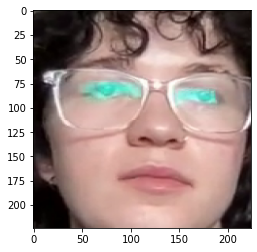

In [ ]:
import cv2

# filename = PREPROCESSED_TRAIN_DIR_PATH / "video" / "60fccc84440f8e8c82ca0288_q1_generic"
for image_path in (
    PREPROCESSED_TRAIN_DIR_PATH / "video" / "60fccc84440f8e8c82ca0288_q1_generic"
).glob("*.png"):
    print(image_path)
    image = cv2.imread(str(image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    break

## Simple Correlation


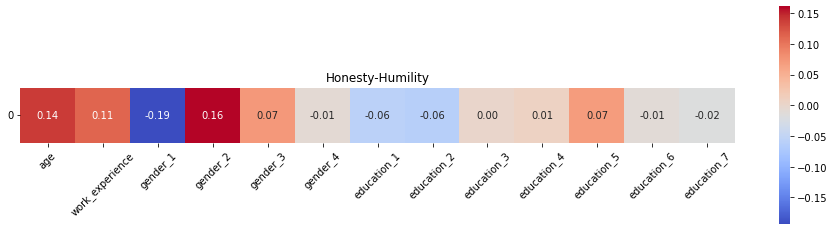

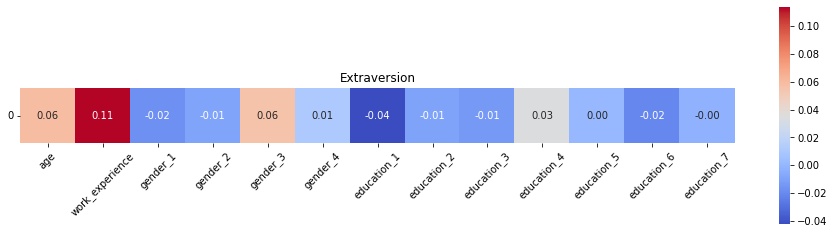

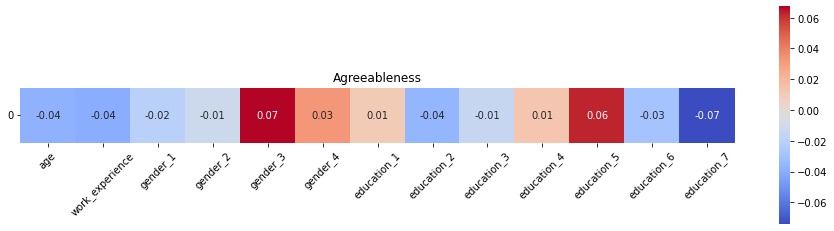

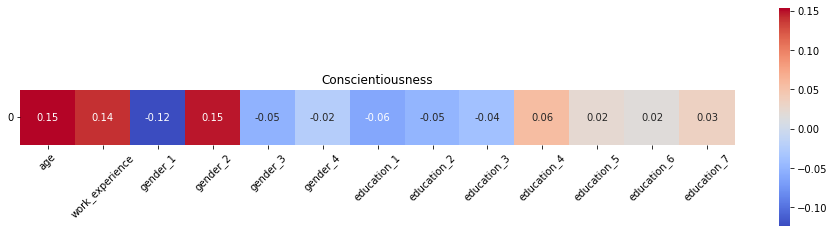

In [ ]:
for trait in personality_labels:
    correlations = features.corrwith(df_train[trait])
    plt.figure(figsize=(16, 4))
    # print(correlations.to_frame().T)
    sns.heatmap(
        correlations.to_frame().T, annot=True, cmap="coolwarm", square=True, fmt=".2f"
    )
    plt.title(trait)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

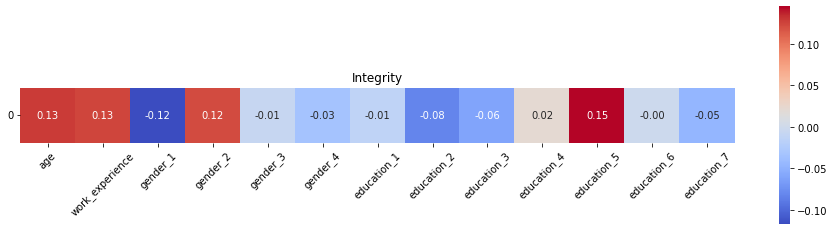

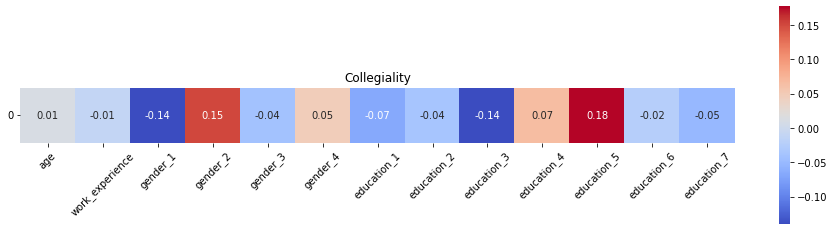

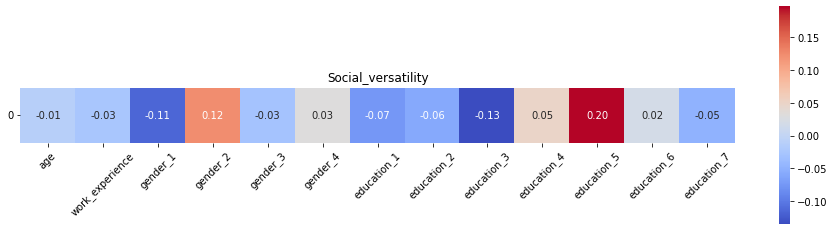

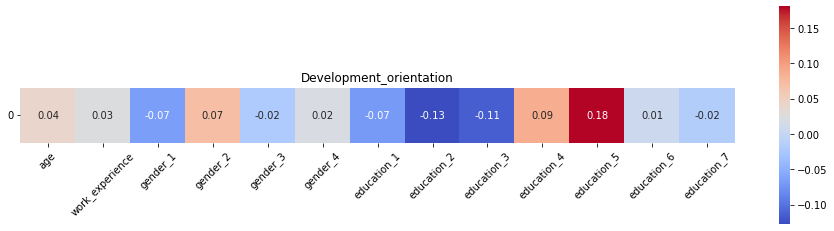

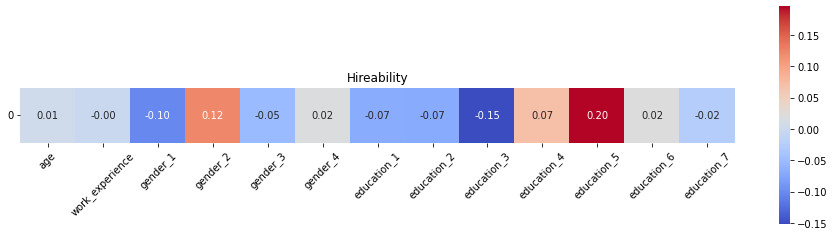

In [27]:
for trait in performance_labels:
    correlations = features.corrwith(df_train[trait])
    plt.figure(figsize=(16, 4))
    # print(correlations.to_frame().T)
    sns.heatmap(
        correlations.to_frame().T, annot=True, cmap="coolwarm", square=True, fmt=".2f"
    )
    plt.title(trait)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

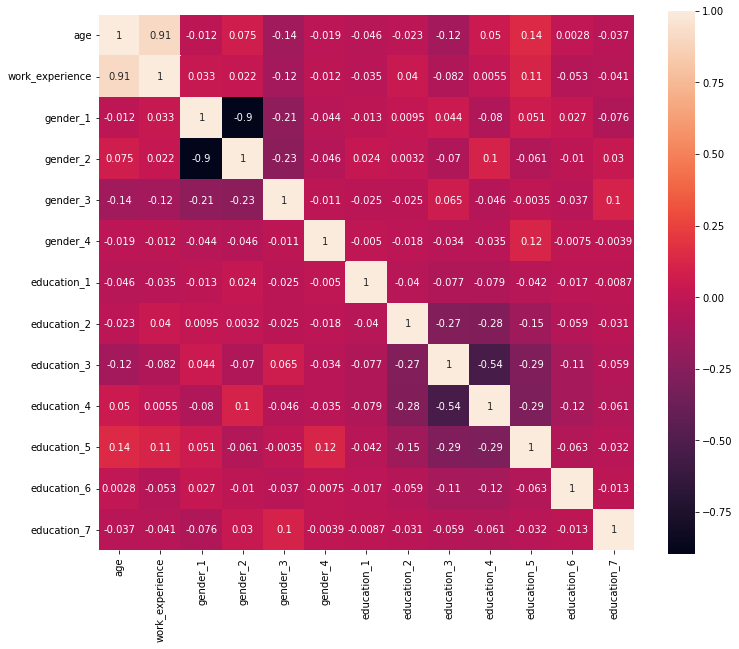

In [39]:
plt.figure(figsize=(12, 10))
sns.heatmap(features.corr(), square=True, annot=True)
plt.show()